In [16]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [17]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "other"
dataset = "chameleon_t8_8k"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 10

## Loading benchmark dataset

In [18]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([7, 4, 5, 3, 6, 8, 2, 1])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [19]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [20]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 2min 18s
Wall time: 2min 27s


## NBC-TI

In [21]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 10.8 s
Wall time: 11 s


## NBC using sklearn.neighbors

In [22]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 93.8 ms
Wall time: 108 ms


## Comparison

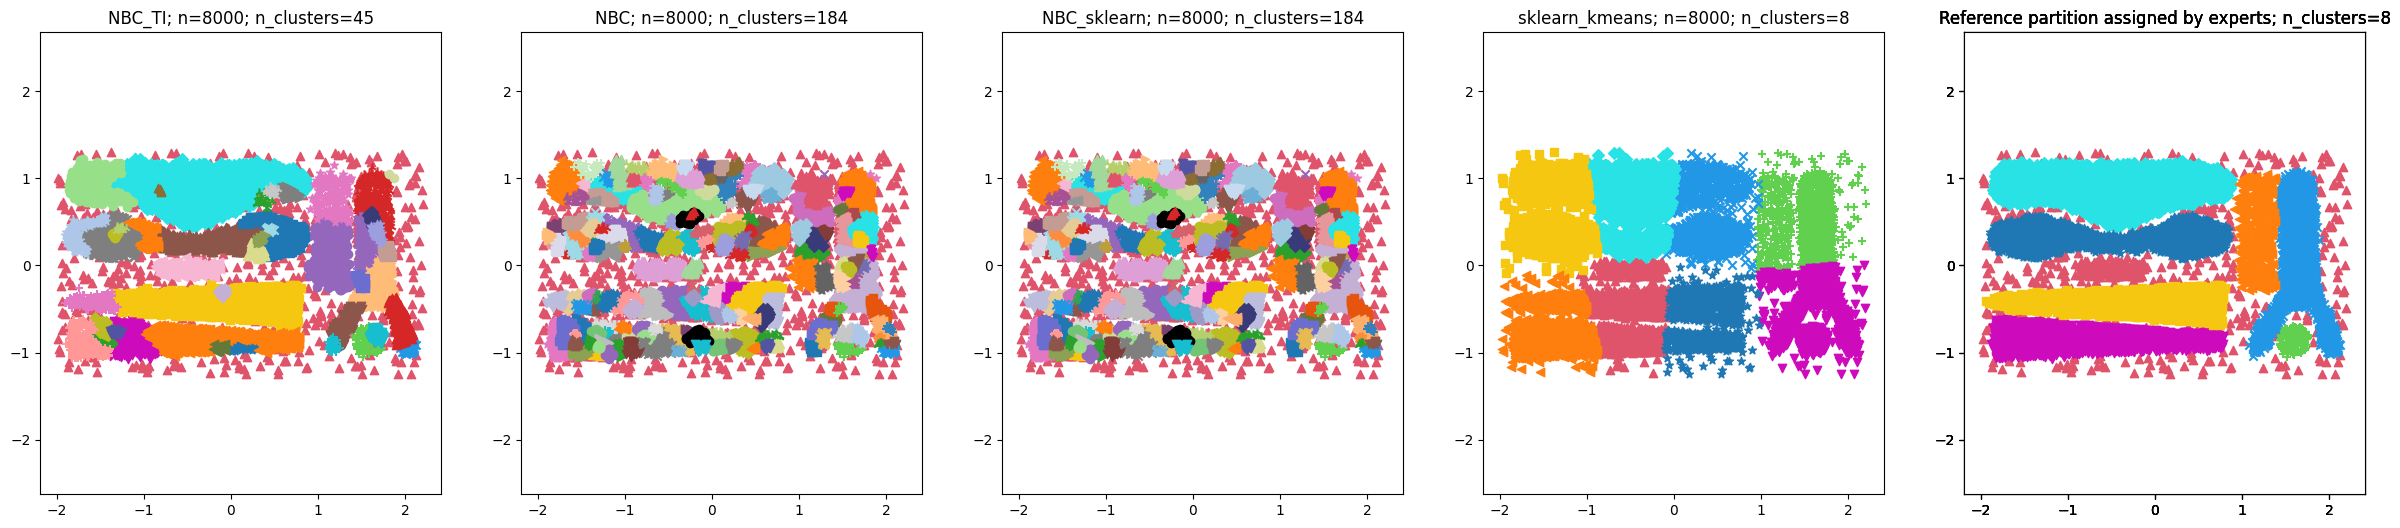

In [23]:
plot_results(benchmark.data, methods, results, reference)

In [24]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=10
╒═════════════════════════════════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════════╤═════════════════════════════════════╕
│ NBC_TI                                                                  │ NBC                             │ NBC_sklearn                     │ sklearn_kmeans                      │
│ [[ 303    1    0    3    4    4    0    3    0    3    4    1    2    3 │ [[332   0   0 ...   0   2   0]  │ [[332   0   0 ...   0   2   0]  │ [[200  50  42  13  52  56  52  56]  │
│      1    0    2    1    0    1    2    5    1    0    0    0    1    0 │  [ 11  71   0 ...   0   0   0]  │  [ 11  71   0 ...   0   0   0]  │  [  0   0   0   0 181   0   0   0]  │
│      3  171    0    0    0    0    0    0    0    0    0    0    0    0 │  [108   0  33 ...   0   0   0]  │  [108   0  33 ...   0   0   0]  │  [  0 692   0   0 691   0   0   0]  │
│      0    2    0]                                              

In [25]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=10
╒═══════════════════════════╤════════════════════════════╤════════════════════════════╤═══════════════════════════╕
│ NBC_TI                    │ NBC                        │ NBC_sklearn                │ sklearn_kmeans            │
│ ar: 0.48446510252111896   │ ar: 0.0863620488164196     │ ar: 0.0863620488164196     │ ar: 0.34471111029889145   │
│ r: 0.8966768033504188     │ r: 0.8421498312289036      │ r: 0.8421498312289036      │ r: 0.8396964620577572     │
│ fm: 0.5928461220188688    │ fm: 0.1887645467142047     │ fm: 0.1887645467142047     │ fm: 0.4397393895486852    │
│ afm: 0.5485427930911227   │ afm: 0.14033520033694064   │ afm: 0.14033520033694064   │ afm: 0.3475773437782549   │
│ mi: 1.812823761161387     │ mi: 1.7086969935381744     │ mi: 1.7086969935381744     │ mi: 1.0824999874268728    │
│ nmi: 0.7146599327035527   │ nmi: 0.5176364050041115    │ nmi: 0.5176364050041115    │ nmi: 0.542193971697988    │
│ ami: 0.7123887306930035   │ ami: 0.5047869629755889    │